# Data Analysis Interview Challenge

## Part 1 ‐ Exploratory data analysis


Ultimate Technologies Inc. is a transportation network company that has disrupted the taxi and logistics industry and is considered a prestigious company to work for. This challenge has been adapted from an actual Ultimate Inc. data science challenge.


The attached `logins.json` file contains (simulated) timestamps of user logins in a particular
geographic location.
- Aggregate these login counts based on 15 minute time intervals
- Visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.
- Please report/illustrate important features of the demand, such as daily cycles.
- If there are data quality issues, please report them.

## Required Libraries

In [1]:
#Fundamental libraries
import numpy as np 
import pandas as pd 

#Plot libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Missing data vizualization libraries
import missingno as msno

# read data
import os 

## Data Preparation

### Reading

In [2]:
# Change directory one step back and save as the root directory
root_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir)

# Define the location of data directory
path = root_dir + '\\data\\'


In [3]:
# Set the file name
file_path = path + 'logins.json'

#Read JSON file into a dataframe: df
df = pd.read_json(file_path)

In [4]:
#Check size of the dataframe
print(df.shape)

(93142, 1)


In [5]:
#Print data types
print(df.dtypes)

login_time    datetime64[ns]
dtype: object


In [6]:
#Display top 10 rows of the df
display(df.head(10))

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


### Pre-processing

In [7]:
# Set datetime fomrat used in the dataset
datetime_format = '%Y-%m-%d hh:mm:ss'

#Change `login_time` coluumn data type to `datetime`
df['time'] = pd.to_datetime(df['login_time'], format=datetime_format, errors="raise")

# Set login_time as index
df.set_index('time', drop=True, inplace=True)

In [8]:
#Add a counter column with value 1
df['value'] = 1

In [9]:
#Check NaN
df.isnull().sum()

login_time    0
value         0
dtype: int64

## Data Wrangling
Aggregate these login counts based on 15 minute time intervals

In [10]:
#Resample('15T') creates a new dataframe with 15-minute intervals.
#The sum() method then sums the counts in each 15-minute interval.

df_15min = df.resample('15T').sum()

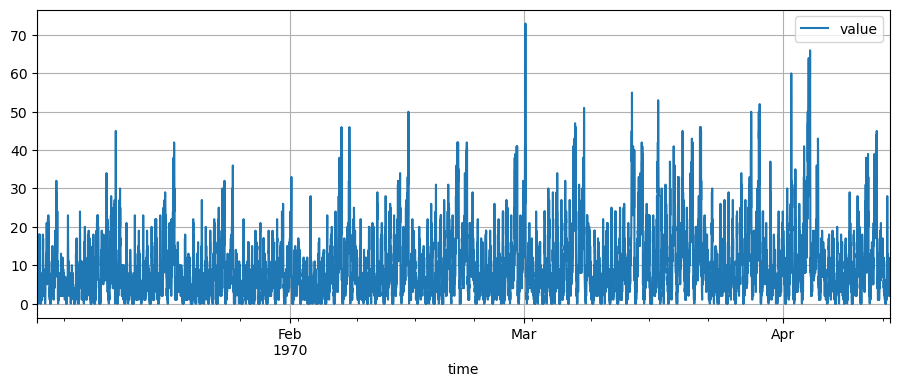

In [11]:
#Plot the entire dataset
df_15min.plot(figsize=(11, 4), grid=True)
plt.show()

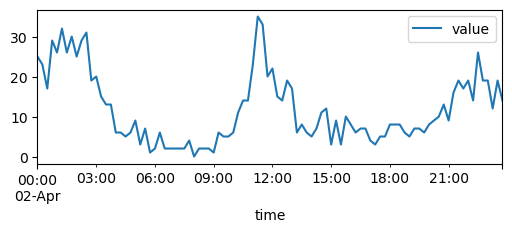

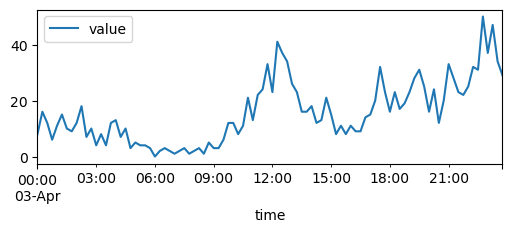

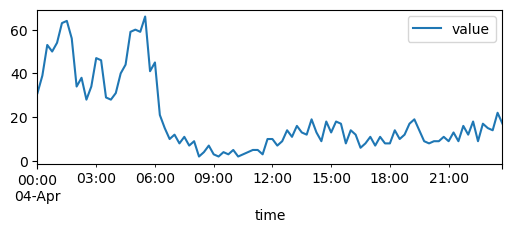

In [12]:
days = np.arange(2,5)

for day in days:
    date = '1970-4-' + str(day)
    df_15min.loc[date].plot(figsize=(6, 2))

In [13]:
df = df_15min.copy()

In [14]:
# Create separate dataframes for weekdays and weekends
weekdays = df[df.index.weekday < 5]
weekends = df[df.index.weekday >= 5]

In [15]:
def time_pivot(df):
    
    # Create a range of datetime objects with 15-minute intervals
    datetime_range = pd.date_range(start='00:00', end='23:59', freq='15min')
    
    # Pivot the table to create columns for each day and rows for each 15-minute interval
    df_pivot = df.pivot_table(index=df.index.time, columns=df.index.date, values='value')

    # Reindex the pivoted table to match the datetime_range index
    df_pivot = df_pivot.reindex(datetime_range.time)

    # Optionally, fill any missing values with 0
    df_pivot = df_pivot.fillna(0)
    
    return df_pivot

In [16]:
weekdays_pivot = time_pivot(weekdays)
weekends_pivot = time_pivot(weekends)

In [17]:
display(weekdays_pivot.head())
display(weekends_pivot.head())

,1970-01-01,1970-01-02,1970-01-05,1970-01-06,1970-01-07,1970-01-08,1970-01-09,1970-01-12,1970-01-13,1970-01-14,...,1970-03-31,1970-04-01,1970-04-02,1970-04-03,1970-04-06,1970-04-07,1970-04-08,1970-04-09,1970-04-10,1970-04-13
00:00:00,0.0,10.0,8.0,7.0,9.0,8.0,23.0,4.0,6.0,9.0,...,14.0,15.0,25.0,8.0,6.0,14.0,6.0,18.0,17.0,12.0
00:15:00,0.0,18.0,3.0,4.0,11.0,16.0,20.0,10.0,6.0,10.0,...,8.0,11.0,23.0,16.0,6.0,10.0,12.0,7.0,15.0,8.0
00:30:00,0.0,12.0,7.0,7.0,5.0,8.0,20.0,7.0,6.0,9.0,...,11.0,14.0,17.0,12.0,6.0,16.0,10.0,16.0,21.0,8.0
00:45:00,0.0,13.0,4.0,7.0,4.0,11.0,10.0,7.0,5.0,13.0,...,6.0,19.0,29.0,6.0,8.0,15.0,9.0,12.0,21.0,4.0
01:00:00,0.0,9.0,7.0,8.0,5.0,9.0,17.0,5.0,6.0,11.0,...,14.0,16.0,26.0,11.0,4.0,9.0,13.0,21.0,19.0,6.0


,1970-01-03,1970-01-04,1970-01-10,1970-01-11,1970-01-17,1970-01-18,1970-01-24,1970-01-25,1970-01-31,1970-02-01,...,1970-03-14,1970-03-15,1970-03-21,1970-03-22,1970-03-28,1970-03-29,1970-04-04,1970-04-05,1970-04-11,1970-04-12
00:00:00,5,11,16,12,16,14,17,14,14,12,...,24,27,16,18,33,32,31,12,31,17
00:15:00,10,14,13,7,19,15,16,9,16,11,...,30,20,23,20,26,30,39,22,27,27
00:30:00,7,15,15,16,19,15,11,14,16,17,...,24,29,18,17,23,28,53,36,17,35
00:45:00,17,12,14,18,27,24,10,18,15,15,...,27,18,20,23,31,30,50,30,17,24
01:00:00,13,7,16,26,13,15,16,16,10,16,...,23,27,22,19,28,27,54,17,20,26


## Final Plots

In [18]:
def plot_timeseries(df, title):
    # calculate upper and lower bounds
    
    df['mean'] = df.mean(1)
    df['std'] = df.std(1)
    
    upper = df['mean'] + df['std']
    lower = df['mean'] - df['std']

    # create plot
    fig, ax = plt.subplots(figsize=(8,4))
    df['mean'].plot(ax=ax)
    ax.fill_between(df.index, upper, lower, alpha=0.2, color='k')
    ax.set_title(title)
    ax.set_xlabel('time')
    ax.set_ylabel('count')
    plt.show()

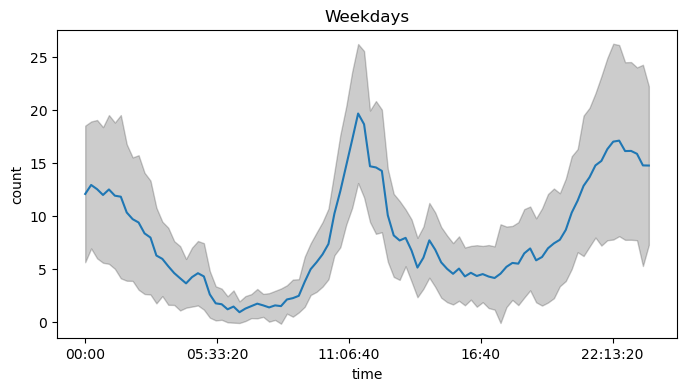

In [19]:
plot_timeseries(weekdays_pivot, 'Weekdays')

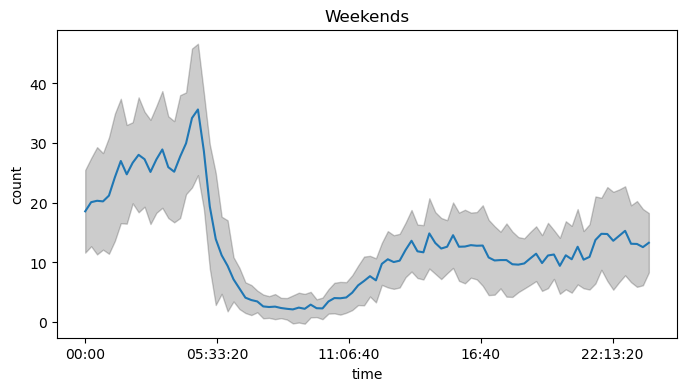

In [20]:
plot_timeseries(weekends_pivot, 'Weekends')